# Gradio

In [1]:
#gradio 설치 완료
# pip install gradio

## 시도 1. Gradio를 사용하여 이미지에 세피아 효과를 적용하는 인터페이스를 생성해보기

In [2]:
import numpy as np
import gradio as gr

def sepia(input_img):
    sepia_filter = np.array([
        [0.393, 0.769, 0.189], 
        [0.349, 0.686, 0.168], 
        [0.272, 0.534, 0.131]
    ])
    sepia_img = input_img.dot(sepia_filter.T)
    sepia_img /= sepia_img.max()
    return sepia_img


demo = gr.Interface(sepia, gr.Image(shape=(200, 200)), "image") #gr.Image(type="filepath", shape=...)
demo.launch(share=True) 

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://dc531c90688f509511.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


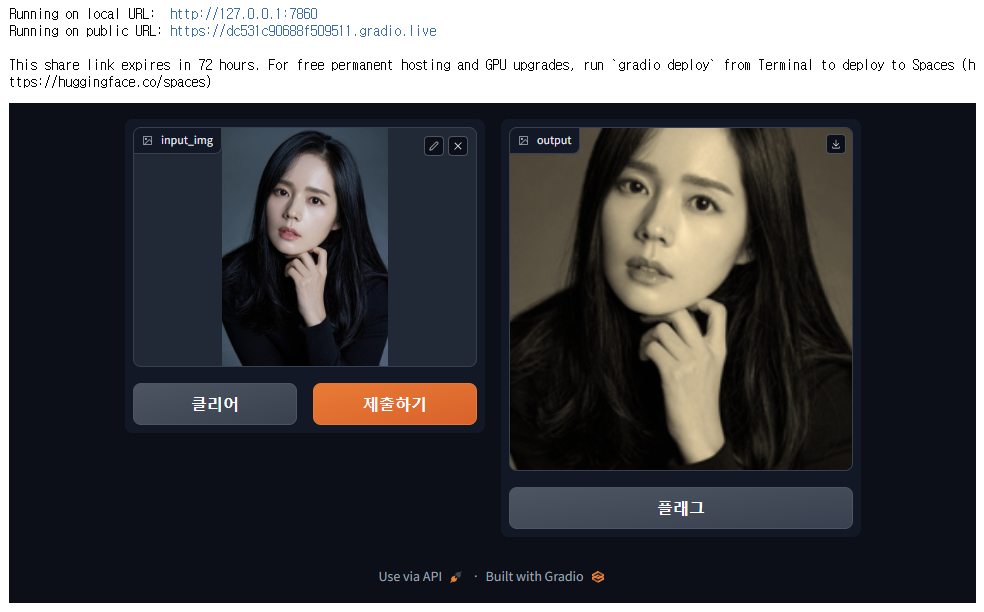

## 시도 2. Gradio를 사용하여 이미지에 웜톤 필터를 적용하는 인터페이스를 생성해보기

In [3]:
import numpy as np
import gradio as gr
from PIL import Image

def tone_filter(input_img):
    input_img = input_img.convert("RGB")  # 이미지를 RGB로 변환
    input_arr = np.array(input_img)  # PIL.Image 객체를 NumPy 배열로 변환
    hsv_arr = np.array(input_img.convert("HSV"))  # HSV로 변환한 NumPy 배열
    hue = hsv_arr[:, :, 0]
    is_warm_tone = np.logical_or(np.logical_and(hue > 0, hue < 60), np.logical_and(hue > 300, hue <= 360))
    filtered_arr = np.zeros_like(input_arr)
    filtered_arr[is_warm_tone] = input_arr[is_warm_tone]
    filtered_img = Image.fromarray(filtered_arr)  # NumPy 배열을 PIL.Image 객체로 변환
    return filtered_img

iface = gr.Interface(fn=tone_filter, inputs="image", outputs="image")
iface.launch(share='True')


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://737326f96fbb74cd50.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/gradio/routes.py", line 439, in run_predict
    output = await app.get_blocks().process_api(
  File "/opt/conda/lib/python3.9/site-packages/gradio/blocks.py", line 1384, in process_api
    result = await self.call_function(
  File "/opt/conda/lib/python3.9/site-packages/gradio/blocks.py", line 1089, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/opt/conda/lib/python3.9/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "/opt/conda/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "/opt/conda/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "/opt/conda/lib/python3.9/site-packages/gradio/utils.py", line 700, in wrapper
    resp

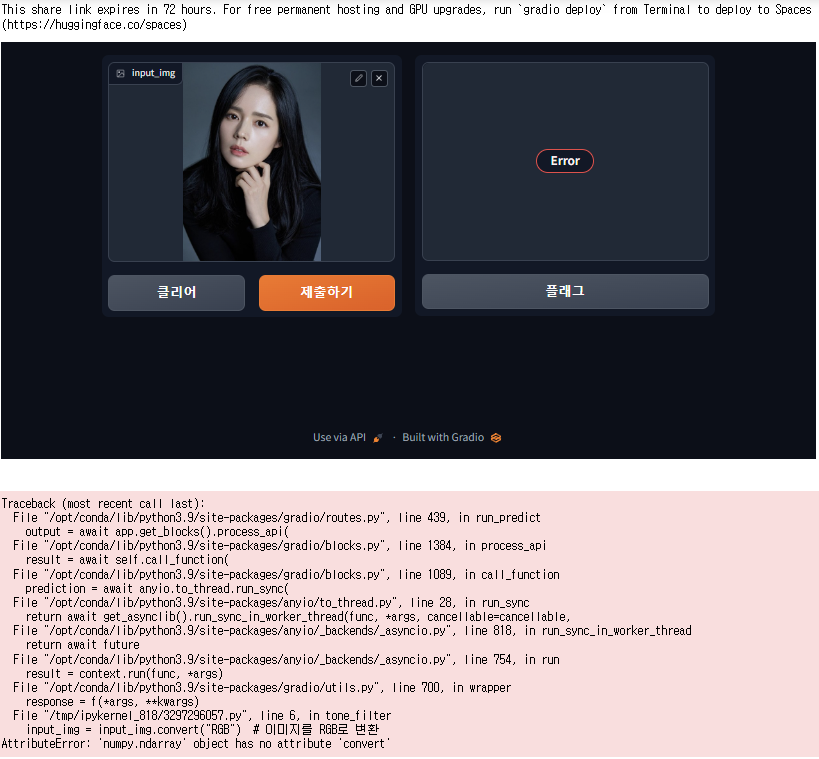

 - tone_filter 함수는 입력 이미지에 웜톤 필터를 적용하여 웜톤 이미지를 생성한다.

 - 주어진 이미지를 RGB로 변환하고, 이를 NumPy 배열로 변환한 후 HSV로 변환한다.

 - HSV 배열에서 색상(Hue) 채널을 추출하여 웜톤 여부를 확인할 수 있다.
 
 - 하지만, NumPy 배열 객체에는 'convert'라는 속성(attribute)이 없어서 발생하는 오류로 실행이 안된다.

## 시도3. 사용자 정의 스타일(Style TransferModel) 변환 모델로 정의하고 수행하기
 - 이 모델은 사전 훈련된 VGG19 모델의 일부 레이어를 사용하여 스타일 변환을 수행

In [17]:
import numpy as np
import gradio as gr
import cv2
import tensorflow as tf

# VGG19 모델 로드
vgg_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

# 스타일 변환 함수
def style_transfer(content_image, style_image):
    # 이미지 크기 조정
    content_image = cv2.resize(content_image, (256, 256))
    style_image = cv2.resize(style_image, (256, 256))

    # 이미지 전처리
    content_array = tf.keras.applications.vgg19.preprocess_input(content_image.astype(np.float32))
    style_array = tf.keras.applications.vgg19.preprocess_input(style_image.astype(np.float32))

    # 특성 맵 추출
    content_features = vgg_model.predict(np.expand_dims(content_array, axis=0))
    style_features = vgg_model.predict(np.expand_dims(style_array, axis=0))

    # 스타일 변환 수행
    # 여기에서 원하는 스타일 변환 알고리즘을 적용합니다.
    # 예시로서 content_features와 style_features를 이용하여 다른 이미지를 생성하도록 작성해두었습니다.
    output_features = content_features + style_features  # 예시로서 content_features와 style_features를 더한 결과를 생성

    # 후처리: 특성 맵을 이미지로 변환
    output_image = tf.keras.applications.vgg19.decode_predictions(output_features, top=1)
    output_image = output_image[0][0][0]
    output_image = np.clip(output_image, 0, 255).astype(np.uint8)

    return output_image

iface = gr.Interface(fn=style_transfer, inputs=["image", "image"], outputs="image")
iface.launch(share='True')


80150528/80134624 [==============================] - 0s 0us/step
Running on local URL:  http://127.0.0.1:7868
Running on public URL: https://0613ce1d7b61ad0fd1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/gradio/routes.py", line 439, in run_predict
    output = await app.get_blocks().process_api(
  File "/opt/conda/lib/python3.9/site-packages/gradio/blocks.py", line 1384, in process_api
    result = await self.call_function(
  File "/opt/conda/lib/python3.9/site-packages/gradio/blocks.py", line 1089, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/opt/conda/lib/python3.9/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "/opt/conda/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "/opt/conda/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "/opt/conda/lib/python3.9/site-packages/gradio/utils.py", line 700, in wrapper
    resp

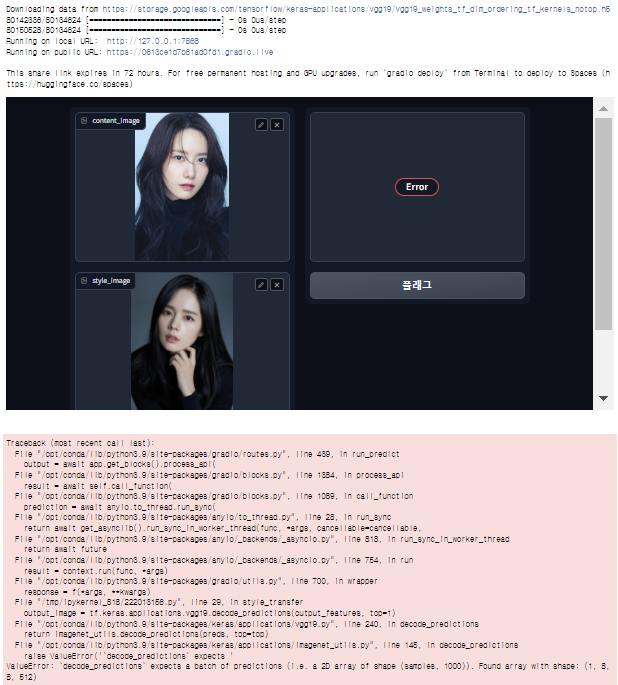

 - decode_predictions 함수가 예상한 형상과 다른 형상의 입력을 받았기 때문에 발생한다.

## 시도4. open cv에서 제공하는 이미지 블렌딩 기법

 - 가장 인기있는 라이브러리라고 해서 시도만 해봄

In [5]:
import numpy as np
import gradio as gr
import cv2

def style_transfer(content_image, style_image):
    # 이미지 크기 조정
    content_image = cv2.resize(content_image, (256, 256))
    style_image = cv2.resize(style_image, (256, 256))

    # 스타일 변환 수행
    stylized_image = cv2.addWeighted(content_image, 0.5, style_image, 0.5, 0)

    return stylized_image

iface = gr.Interface(fn=style_transfer, inputs=["image", "image"], outputs="image")
iface.launch(share='True')


Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://a027c19a947d625756.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


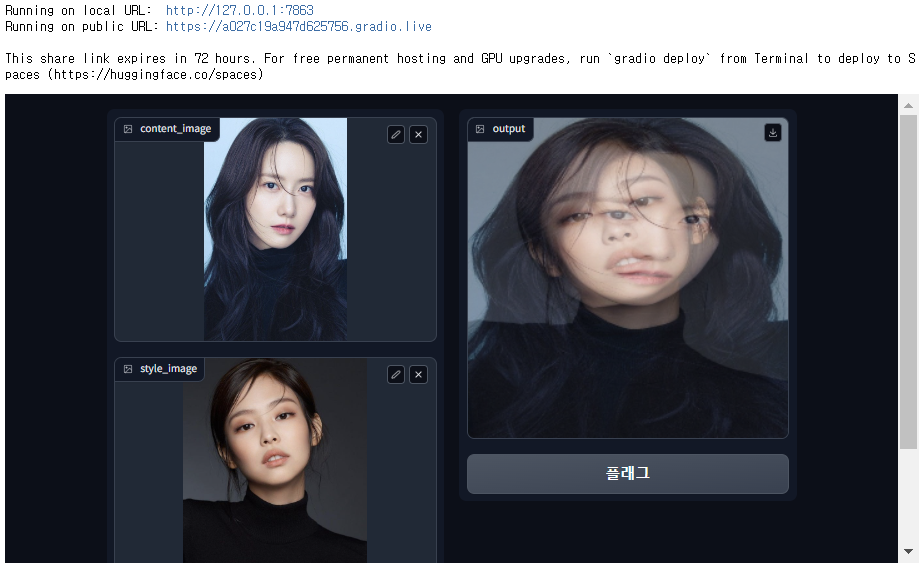